### Pacote Pandas - Que servirá para leitura dos dados

In [96]:
import pandas as pd
publi = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0) # index_col informando qual coluna será utilizada como índice
publi.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [97]:
print(type(publi))

<class 'pandas.core.frame.DataFrame'>


In [98]:
print(publi.shape)

(200, 4)


In [99]:
x = publi[['TV', 'radio', 'newspaper']]
y = publi['sales']

### Pacote Seaborn - Que servirá para termos uma visualização gráfica dos dados em Python

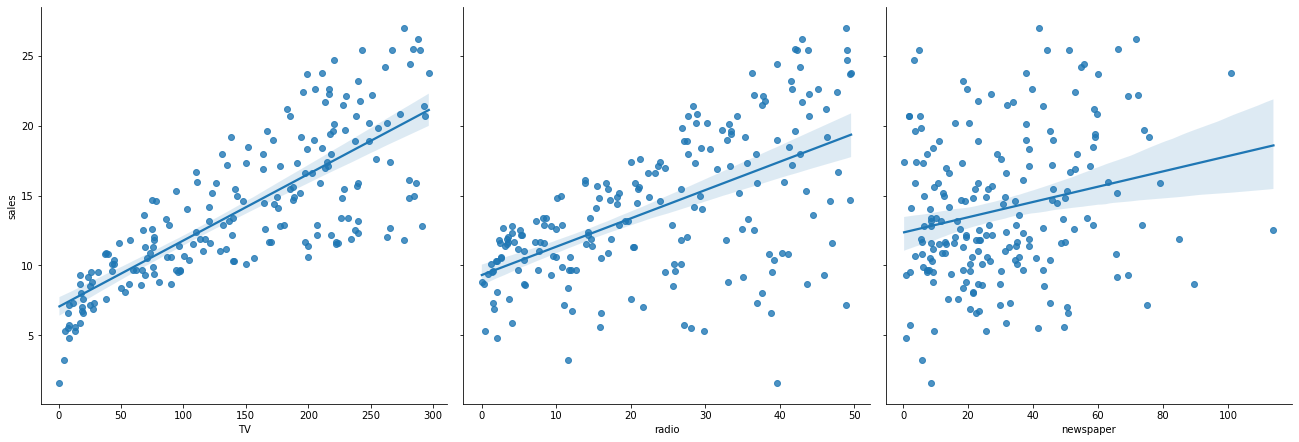

In [100]:
import seaborn as sns
sns.pairplot(publi, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=6, kind='reg')

### Dividindo em dois grupo, treino e teste

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)  # random_state=5 para garantir nenhuma diferença na previsão

### Modelo de Regressão Linear
* O modelo de regressão linear pode ser representado por um gráfico, com uma linha chamada  de  'Linha de Regressão',  desenhada a partir do método 'Least Squares Method' que vai chegar numa linha que produz  o  menor erro  possível,   que passa "próximo" dos pontos de intersecção, as distâncias entre a reta e as intersecções são erros representadas por (e1, e2, e..), o erro total é calculado pela soma dos quadrados dos erro.
* O modelo portanto gera uma linha  que representa o menor erro possível, portanto podemos utilizar essa linha para fazer previsões.

In [102]:
from sklearn.linear_model import LinearRegression
reglin = LinearRegression()
reglin.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Coeficiente: Aumento das vendas a cada 1 unidade investida em publicidade

In [103]:
print('Interpretando : ')

coeficientes = list(zip(['TV', 'radio', 'newspaper'], reglin.coef_))

print(f'A cada 1$ invertido em {coeficientes[0][0]} teremos um aumento de {round(coeficientes[0][1], 5)}%')
print(f'A cada 1$ invertido em {coeficientes[1][0]} teremos um aumento de {round(coeficientes[1][1], 5)}%')
print(f'A cada 1$ invertido em {coeficientes[2][0]} teremos um aumento de {round(coeficientes[2][1], 5)}%')

Interpretando : 
A cada 1$ invertido em TV teremos um aumento de 0.04669%
A cada 1$ invertido em radio teremos um aumento de 0.18502%
A cada 1$ invertido em newspaper teremos um aumento de -0.00153%


### Previsões de x_test

In [104]:
tv_radio_newspaper_prev = reglin.predict(x_test)
print(tv_radio_newspaper_prev)

[ 6.81057871 13.85553519 12.19071591  9.80746626 15.63552195 10.10726578
 13.85639727 11.69570633 19.57289989 10.70200132 18.89676557  7.69423008
 14.96942948 16.50998946 21.31237989 20.43708495 17.60317491 20.54908713
  6.67087274 11.74265195 10.75799527 15.05174303 20.54706248 14.42570106
 19.96135224 21.33448159 13.97054268 23.35717801  8.45514555 20.84998043
 15.86999695 15.33338947 21.80769468 18.45552511 12.82705009  9.43659316
  5.42557656 12.08387952 19.35734929  8.19043934 12.47853095 16.97647715
 10.73795787 15.26797326 16.72364603 12.2583435  15.08384655 16.43250419
 14.33374794 10.46257596 15.10826603  7.2191011  14.15164628 16.49287732
 15.23547114  8.94344031  7.58659069 17.89584427 22.99403868 12.87971019]


In [105]:
y_test.head()

120     6.6
78     14.2
149    10.9
150    10.1
155    15.6
Name: sales, dtype: float64

### Avaliação da performance do modelo

#### MAE (Mean Absolute Error) - Aplica uma média absoluta dos erros

In [106]:
from sklearn import metrics

In [107]:
print(metrics.mean_absolute_error(y_test, tv_radio_newspaper_prev))

1.2162256013390464


#### MSE (Mean Squared Error) - Vai aplicar uma média sobre o quadrado dos erros, intensificando os erros

In [108]:
print(metrics.mean_squared_error(y_test, tv_radio_newspaper_prev))

2.504406518845737


#### RMSE (Root Mean Squared Error) - Aplica uma raiz quadrada sobre "MSE"

In [109]:
import numpy as np
print(np.sqrt(metrics.mean_squared_error(y_test, tv_radio_newspaper_prev)))

1.5825316802028757


# Exercício Vídeo 63

## Comparativo de performance TV x Rádio

In [110]:
x = publi[['TV', 'radio']]
y = publi['sales']

In [111]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [112]:
reglin.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
tv_radio_prev = reglin.predict(x_test)

In [114]:
print(f'MAE  (Mean Absolute Error)     - {metrics.mean_absolute_error(y_test, tv_radio_prev)}')
print(f'MSE  (Mean Squared Error)      - {metrics.mean_squared_error(y_test, tv_radio_prev)}')
print(f'RMSE (Root Mean Squared Error) - {np.sqrt(metrics.mean_squared_error(y_test, tv_radio_prev))}')

MAE  (Mean Absolute Error)     - 1.2149068467539905
MSE  (Mean Squared Error)      - 2.5031161112953884
RMSE (Root Mean Squared Error) - 1.5821239241271172


## Comparativo TV x Newspaper

In [115]:
x = publi[['TV', 'newspaper']]
y = publi['sales']

In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [117]:
reglin.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
tv_newspaper_prev = reglin.predict(x_test)

In [119]:
print(f'MAE  (Mean Absolute Error)     - {metrics.mean_absolute_error(y_test, tv_newspaper_prev)}')
print(f'MSE  (Mean Squared Error)      - {metrics.mean_squared_error(y_test, tv_newspaper_prev)}')
print(f'RMSE (Root Mean Squared Error) - {np.sqrt(metrics.mean_squared_error(y_test, tv_newspaper_prev))}')

MAE  (Mean Absolute Error)     - 2.379102311273906
MSE  (Mean Squared Error)      - 9.580019539406358
RMSE (Root Mean Squared Error) - 3.095160664554646


## Comparativo Rádio x Newspaper

In [120]:
x = publi[['radio', 'newspaper']]
y = publi['sales']

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

In [122]:
reglin.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
radio_newspaper_prev = reglin.predict(x_test)

In [124]:
print(f'MAE  (Mean Absolute Error)     - {metrics.mean_absolute_error(y_test, radio_newspaper_prev)}')
print(f'MSE  (Mean Squared Error)      - {metrics.mean_squared_error(y_test, radio_newspaper_prev)}')
print(f'RMSE (Root Mean Squared Error) - {np.sqrt(metrics.mean_squared_error(y_test, radio_newspaper_prev))}')

MAE  (Mean Absolute Error)     - 3.230067173578635
MSE  (Mean Squared Error)      - 16.35963730885014
RMSE (Root Mean Squared Error) - 4.044704848174974


## Apresentando melhor resultado

In [125]:
avaliacoes                         = {}
avaliacoes['TV, radio, newspaper'] = np.sqrt(metrics.mean_squared_error(y_test, tv_radio_newspaper_prev))
avaliacoes['TV, radio']            = np.sqrt(metrics.mean_squared_error(y_test, tv_radio_prev          ))
avaliacoes['TV, newspaper']        = np.sqrt(metrics.mean_squared_error(y_test, tv_newspaper_prev      ))
avaliacoes['radio, newspaper']     = np.sqrt(metrics.mean_squared_error(y_test, radio_newspaper_prev   ))

In [126]:
melhor_resultado = None

for midias, performance in avaliacoes.items():
    if melhor_resultado == None or melhor_resultado > performance:
        melhor_resultado = performance

for midias, performance in avaliacoes.items():
    if round(melhor_resultado, 3) == round(performance, 3):
        print(f'Campeão: [{midias}] com coeficiente de {performance}')

Campeão: [TV, radio] com coeficiente de 1.5821239241271172
